### Credit Risk Modeling 

#### Overview

- Credit Risk Definition: The likelihood that a borrower will not repay their loan.
- Expected Loss Calculation: Comprising the probability of default, exposure at default, and loss given default.
- Data Types for Modeling: Application data (tied to the loan application) and behavioral data (describing the loan recipient).

Expected Loss ( amount the firm loss as a result of loan default )

= PD * EAD * LGD

components included:

- Probability of Default (PD) (likelyhood of a client defaulting on a loan)

- Exposure at Default (EAD) (The amount outstanding at the time of default)

- Losss Given Default (LGD) (The ratio of the exposure against any recovery from loss)

This Analysis will focus on propability of default (PD)

#### Data Description

A mix of these data types is important:

- Application Data (Interest Rate, Grade, Amount)
- Behavioural Data (Employment Length, Historical Default, Income)

For the purpose of demonstration, the data I have used is emulating real credit application data.
These open source datasets have been imported from DataCamp. 

Credit Bureau Data:
- Income 
- Age 
- Home ownership
- Employment length 
- Loan intent
- Percent Income 
- Loan grade
- Loan amount
- Interest rate 
- Laon status
- Historical default 
- Credit history length

### EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('credit_data.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [8]:
print(df.shape)

(32581, 12)


In [9]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
df.apply(lambda x: (x == 0).sum())

person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length              4105
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_status                   25473
loan_percent_income               9
cb_person_default_on_file         0
cb_person_cred_hist_length        0
dtype: int64

### Visualizations - Distribution Analysis 

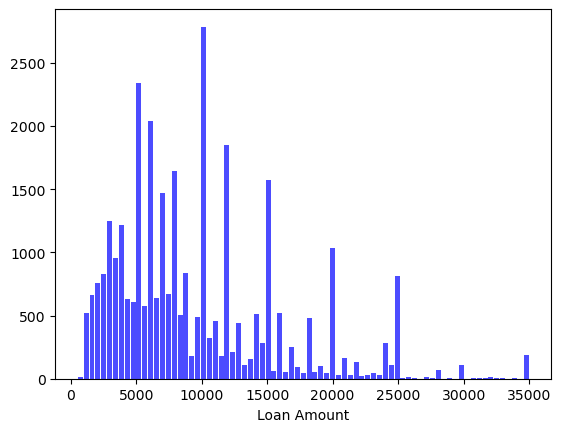

In [7]:
# The distribution of loan amounts
n, bins, patches = plt.hist(x=df['loan_amnt'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

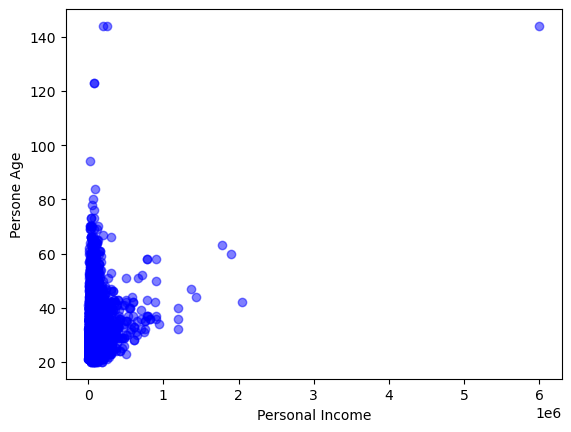

In [11]:
# Plot a scatter plot of income against age
plt.scatter(df['person_income'], df['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [12]:
# A cross table of the loan intent and loan status
print(pd.crosstab(df['loan_intent'], df['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [14]:
# A cross table of home ownership, loan status, and grade
print(pd.crosstab(df['person_home_ownership'],[df['loan_status'],df['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [16]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(df['person_home_ownership'], df['loan_status'],
              values=df['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


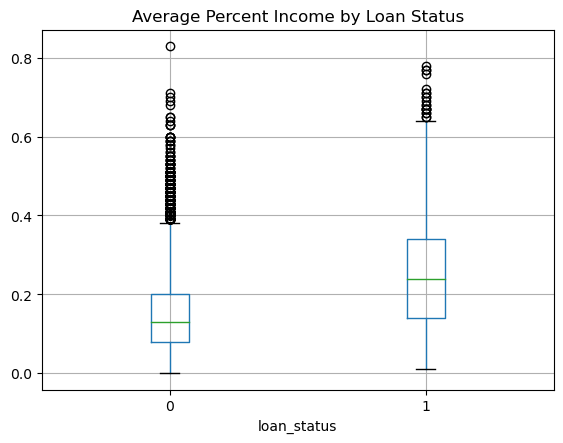

In [18]:
# Create a box plot of percentage income by loan status
df.boxplot(column=['loan_percent_income'], by='loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

### Data Cleaning